# テンソル多体分解の実装

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools

import numpy as np
import cupy as cp

from legendre_decomp import LD as LD_cupy
from legendre_decomp.naive import LD


# 実験

## Randomテンソルによる実験

### ２次近似

In [41]:
N = 10
X = np.random.uniform(0, 0.1, size=(N, N, N, N))
X

array([[[[0.0151572 , 0.08537238, 0.09037948, ..., 0.05202987,
          0.06112583, 0.07873804],
         [0.08713797, 0.0076415 , 0.01209342, ..., 0.08249421,
          0.07906877, 0.04712078],
         [0.05899984, 0.07859553, 0.01869673, ..., 0.03624915,
          0.05620543, 0.0587144 ],
         ...,
         [0.05640667, 0.08175671, 0.07268123, ..., 0.04380416,
          0.09766262, 0.0213836 ],
         [0.03833343, 0.08173474, 0.0370843 , ..., 0.04782177,
          0.03746111, 0.08326555],
         [0.00665224, 0.0197265 , 0.07522511, ..., 0.01142777,
          0.03428192, 0.07238062]],

        [[0.00139845, 0.07060523, 0.01543604, ..., 0.08796358,
          0.07495689, 0.04594513],
         [0.04284884, 0.09332463, 0.08913415, ..., 0.09958585,
          0.08397211, 0.04081406],
         [0.00305671, 0.03017592, 0.02511608, ..., 0.09242509,
          0.02459078, 0.02136276],
         ...,
         [0.00087081, 0.09842965, 0.02945372, ..., 0.00746072,
          0.04179832, 0.0

In [42]:
print(X.shape)
all_history_kl, scaleX, Q, Hq = MBTA(X, order=2)

(10, 10, 10, 10)
iter= 0 kl= 0.19294740464611804 mse= 3.342671660949364e-09
iter= 1 kl= 0.18960092360857073 mse= 3.281540128160178e-09
iter= 2 kl= 0.19016950030570534 mse= 3.2969106323518644e-09


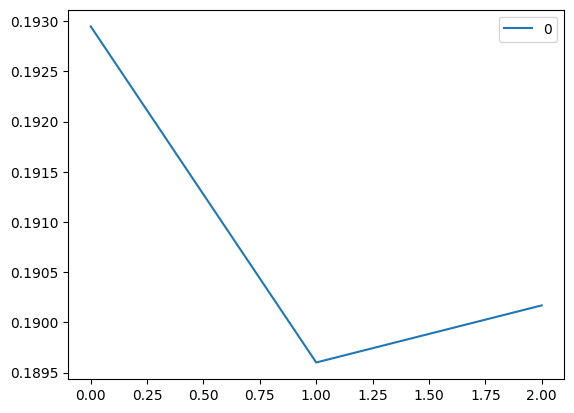

In [43]:
import matplotlib.pyplot as plt

for k, history_kl in enumerate(all_history_kl):
    plt.plot(history_kl, label="{}".format(k))
plt.legend()

In [44]:
print(X.shape)
all_history_kl, scaleX, Q, Hq = LD_cupy(X, order=2, gpu=False)

(10, 10, 10, 10)
iter= 0 kl= 0.19294740464611804 mse= 3.342671660949364e-09
iter= 1 kl= 0.18960092360857073 mse= 3.281540128160179e-09
iter= 2 kl= 0.19016950030570523 mse= 3.2969106323518644e-09


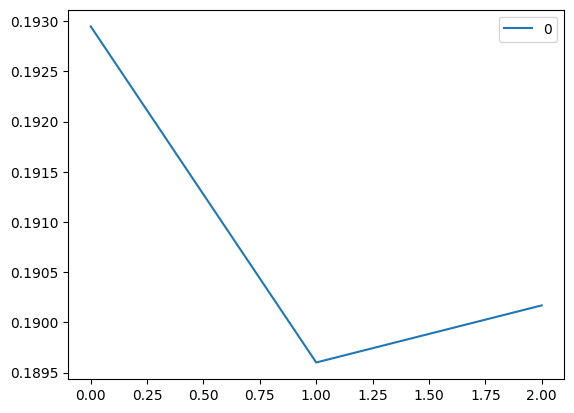

In [45]:
import matplotlib.pyplot as plt

for k, history_kl in enumerate(all_history_kl):
    plt.plot(history_kl, label="{}".format(k))
plt.legend()

In [8]:
print(X.shape)
all_history_kl, scaleX, Q, Hq = MBTA_cupy(X, order=2)

(10, 10, 10, 10)
iter= 0 kl= 0.19199706035293007 mse= 3.313315487828296e-09
iter= 1 kl= 0.18872779483594282 mse= 3.2527064280824502e-09
iter= 2 kl= 0.18934495596572753 mse= 3.2685130085164593e-09


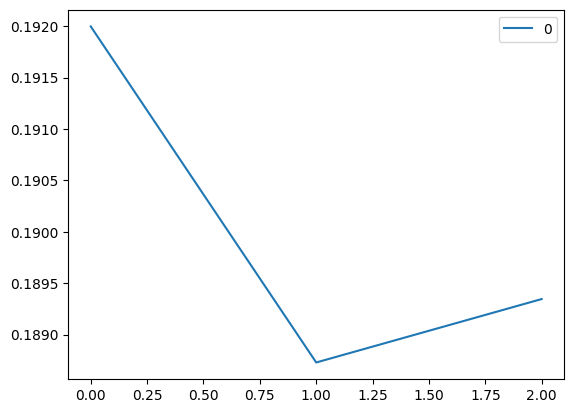

In [9]:
import matplotlib.pyplot as plt

for k, history_kl in enumerate(all_history_kl):
    plt.plot(history_kl, label="{}".format(k))
plt.legend()

## 画像テンソルによる実験

### 2次近似

(32, 32, 3)


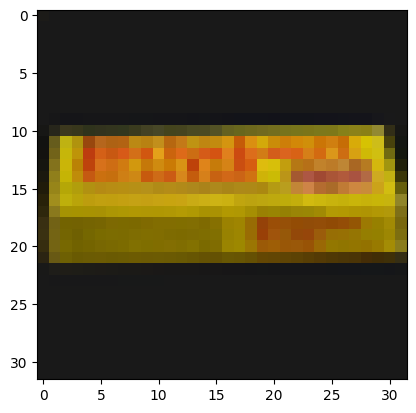

(32, 32, 3)


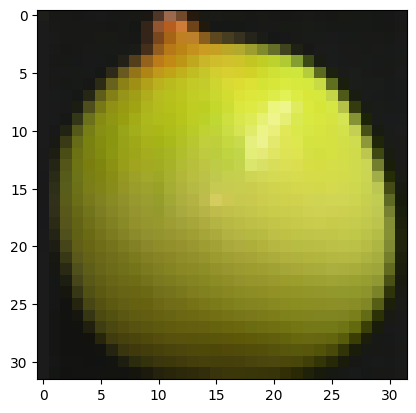

(32, 32, 3)


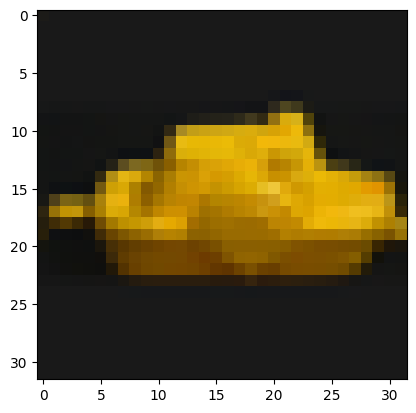

(32, 32, 3)


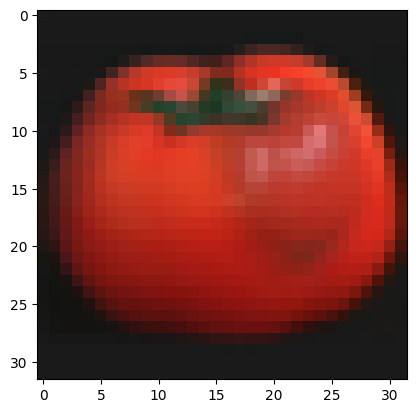

(4, 32, 32, 3)

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

X = []
for k in range(1, 5):
    # ファイル名、パス
    file_name = "coil-100/obj{}__0.png".format(k)
    img = Image.open(file_name)
    img = img.resize((32, 32))
    array_obj = np.asarray(img)
    print(array_obj.shape)
    # 画像の表示
    plt.imshow(array_obj)
    plt.show()
    X.append(array_obj)
X = np.array(X)
X = (X + 1) / 256.0
X.shape

In [11]:
# all_history_kl, scaleX, Q, Hq = LD_cupy(X, order=2)
all_history_kl, scaleX, Q, Hq = LD(X, order=2)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815624e-09
iter= 1 kl= 0.10298763093803354 mse= 4.315431361739234e-09
iter= 2 kl= 0.05993571189007629 mse= 1.2021983416556778e-09
iter= 3 kl= 0.05672642665319971 mse= 9.041612448785822e-10
iter= 4 kl= 0.05637659105749315 mse= 8.625459326492386e-10
iter= 5 kl= 0.05630926475531273 mse= 8.553732950321973e-10
iter= 6 kl= 0.05628995029188255 mse= 8.539528474251728e-10
iter= 7 kl= 0.05628289474445558 mse= 8.536284408412897e-10


In [12]:
all_history_kl, scaleX, Q, Hq = LD_cupy(X, order=2, gpu=False)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815624e-09
iter= 1 kl= 0.10298763093803331 mse= 4.3154313617391614e-09
iter= 2 kl= 0.05993571189007607 mse= 1.202198341655669e-09
iter= 3 kl= 0.05672642665319949 mse= 9.041612448785774e-10
iter= 4 kl= 0.05637659105749293 mse= 8.625459326492415e-10
iter= 5 kl= 0.056309264755312505 mse= 8.553732950321925e-10
iter= 6 kl= 0.05628995029188233 mse= 8.53952847425172e-10
iter= 7 kl= 0.0562828947444558 mse= 8.536284408412907e-10


In [13]:
all_history_kl, scaleX, Q, Hq = LD_cupy(X, order=2)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815619e-09
iter= 1 kl= 0.10298763093803354 mse= 4.3154313617392235e-09
iter= 2 kl= 0.05993571189007607 mse= 1.2021983416556693e-09
iter= 3 kl= 0.05672642665319949 mse= 9.041612448785739e-10
iter= 4 kl= 0.05637659105749271 mse= 8.625459326492372e-10
iter= 5 kl= 0.056309264755312505 mse= 8.553732950321955e-10
iter= 6 kl= 0.05628995029188255 mse= 8.539528474251788e-10
iter= 7 kl= 0.05628289474445536 mse= 8.536284408412787e-10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


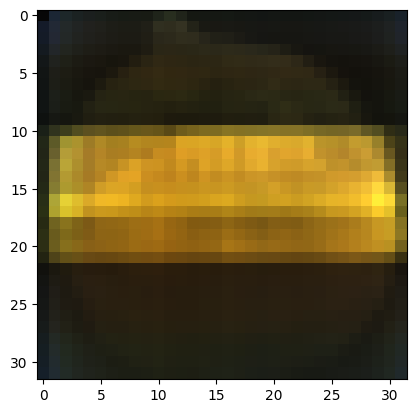

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


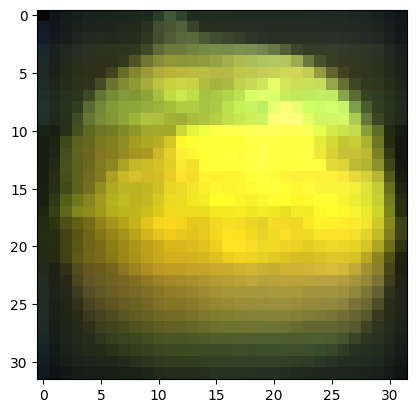

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


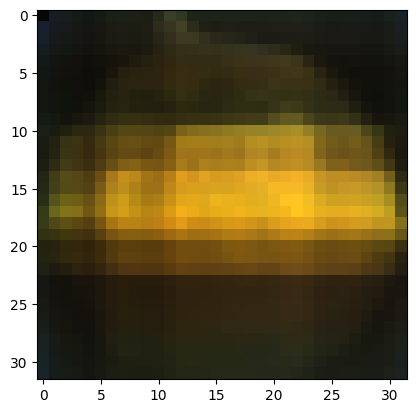

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


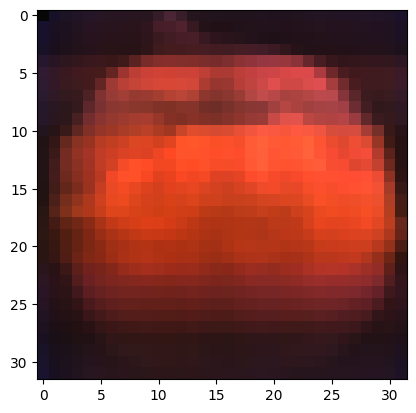

In [14]:
# 前処理の逆変換
X_recons = (Q * scaleX * 256).astype(np.int32)

for i in range(len(X_recons)):
    plt.imshow(X_recons[i])
    plt.show()

### リング分解による実装

In [15]:
# ring decomposition
def constraint(I):
    I = np.array(I)
    idx = np.where(I)[0]
    if len(idx) == 2:
        if idx[1] - idx[0] == 1 or (idx[1] == 3 and idx[0] == 0):
            return True
        else:
            return False
    else:
        return False


B = [
    I
    for I in itertools.product(*[list(range(X.shape[d])) for d in range(len(X.shape))])
    if constraint(I)
]
B

[(0, 0, 1, 1),
 (0, 0, 1, 2),
 (0, 0, 2, 1),
 (0, 0, 2, 2),
 (0, 0, 3, 1),
 (0, 0, 3, 2),
 (0, 0, 4, 1),
 (0, 0, 4, 2),
 (0, 0, 5, 1),
 (0, 0, 5, 2),
 (0, 0, 6, 1),
 (0, 0, 6, 2),
 (0, 0, 7, 1),
 (0, 0, 7, 2),
 (0, 0, 8, 1),
 (0, 0, 8, 2),
 (0, 0, 9, 1),
 (0, 0, 9, 2),
 (0, 0, 10, 1),
 (0, 0, 10, 2),
 (0, 0, 11, 1),
 (0, 0, 11, 2),
 (0, 0, 12, 1),
 (0, 0, 12, 2),
 (0, 0, 13, 1),
 (0, 0, 13, 2),
 (0, 0, 14, 1),
 (0, 0, 14, 2),
 (0, 0, 15, 1),
 (0, 0, 15, 2),
 (0, 0, 16, 1),
 (0, 0, 16, 2),
 (0, 0, 17, 1),
 (0, 0, 17, 2),
 (0, 0, 18, 1),
 (0, 0, 18, 2),
 (0, 0, 19, 1),
 (0, 0, 19, 2),
 (0, 0, 20, 1),
 (0, 0, 20, 2),
 (0, 0, 21, 1),
 (0, 0, 21, 2),
 (0, 0, 22, 1),
 (0, 0, 22, 2),
 (0, 0, 23, 1),
 (0, 0, 23, 2),
 (0, 0, 24, 1),
 (0, 0, 24, 2),
 (0, 0, 25, 1),
 (0, 0, 25, 2),
 (0, 0, 26, 1),
 (0, 0, 26, 2),
 (0, 0, 27, 1),
 (0, 0, 27, 2),
 (0, 0, 28, 1),
 (0, 0, 28, 2),
 (0, 0, 29, 1),
 (0, 0, 29, 2),
 (0, 0, 30, 1),
 (0, 0, 30, 2),
 (0, 0, 31, 1),
 (0, 0, 31, 2),
 (0, 1, 1, 0),
 (0, 1, 2, 

In [16]:
all_history_kl, scaleX, Q, Hq = LD(X, B)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815624e-09
iter= 1 kl= 0.10524330244727587 mse= 1.8355928689278943e-09
iter= 2 kl= 0.08368414101323518 mse= 1.1049835167440047e-09
iter= 3 kl= 0.08538042753311181 mse= 1.050682116438844e-09


In [17]:
all_history_kl, scaleX, Q, Hq = LD_cupy(X, B, gpu=False)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815624e-09
iter= 1 kl= 0.10524330244727542 mse= 1.8355928689278646e-09
iter= 2 kl= 0.0836841410132354 mse= 1.1049835167440018e-09
iter= 3 kl= 0.08538042753311204 mse= 1.0506821164388448e-09


In [18]:
all_history_kl, scaleX, Q, Hq = LD_cupy(X, B)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815619e-09
iter= 1 kl= 0.10524330244727542 mse= 1.8355928689278712e-09
iter= 2 kl= 0.08368414101323518 mse= 1.1049835167440008e-09
iter= 3 kl= 0.08538042753311204 mse= 1.0506821164388459e-09


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


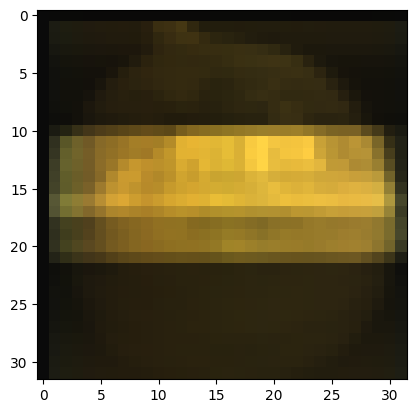

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


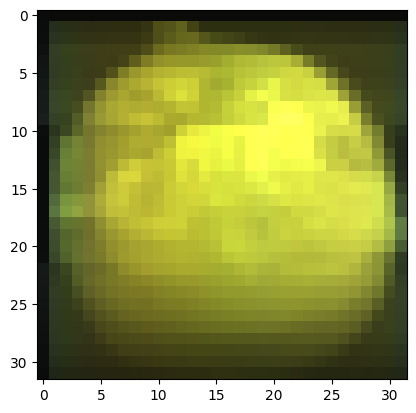

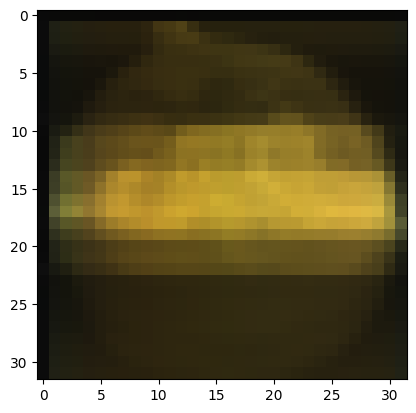

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


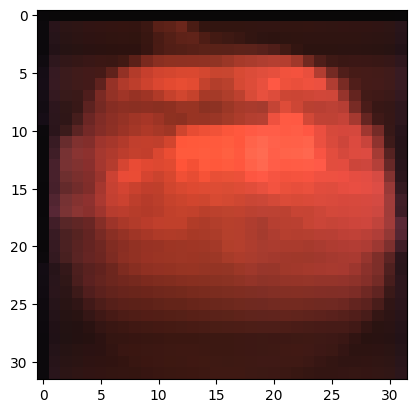

In [19]:
X_recons = (Q * scaleX * 256).astype(np.int32)

for i in range(len(X_recons)):
    plt.imshow(X_recons[i])
    plt.show()

### 依存関係Bを設計

In [20]:
# ２次の近似から、index - channel 結合を切断する
def constraint(I):
    I = np.array(I)
    if np.sum(I != 0) <= 2:
        if I[0] != 0 and I[3] != 0:
            return False
        else:
            return True
    else:
        return False


B = [
    I
    for I in itertools.product(*[list(range(X.shape[d])) for d in range(len(X.shape))])
    if constraint(I)
]
B

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 0, 2),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 2),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 0, 2, 2),
 (0, 0, 3, 0),
 (0, 0, 3, 1),
 (0, 0, 3, 2),
 (0, 0, 4, 0),
 (0, 0, 4, 1),
 (0, 0, 4, 2),
 (0, 0, 5, 0),
 (0, 0, 5, 1),
 (0, 0, 5, 2),
 (0, 0, 6, 0),
 (0, 0, 6, 1),
 (0, 0, 6, 2),
 (0, 0, 7, 0),
 (0, 0, 7, 1),
 (0, 0, 7, 2),
 (0, 0, 8, 0),
 (0, 0, 8, 1),
 (0, 0, 8, 2),
 (0, 0, 9, 0),
 (0, 0, 9, 1),
 (0, 0, 9, 2),
 (0, 0, 10, 0),
 (0, 0, 10, 1),
 (0, 0, 10, 2),
 (0, 0, 11, 0),
 (0, 0, 11, 1),
 (0, 0, 11, 2),
 (0, 0, 12, 0),
 (0, 0, 12, 1),
 (0, 0, 12, 2),
 (0, 0, 13, 0),
 (0, 0, 13, 1),
 (0, 0, 13, 2),
 (0, 0, 14, 0),
 (0, 0, 14, 1),
 (0, 0, 14, 2),
 (0, 0, 15, 0),
 (0, 0, 15, 1),
 (0, 0, 15, 2),
 (0, 0, 16, 0),
 (0, 0, 16, 1),
 (0, 0, 16, 2),
 (0, 0, 17, 0),
 (0, 0, 17, 1),
 (0, 0, 17, 2),
 (0, 0, 18, 0),
 (0, 0, 18, 1),
 (0, 0, 18, 2),
 (0, 0, 19, 0),
 (0, 0, 19, 1),
 (0, 0, 19, 2),
 (0, 0, 20, 0),
 (0, 0, 20, 1),
 (0, 0, 20, 2),
 (0, 0, 21, 0),
 (0, 0

In [21]:
all_history_kl, scaleX, Q, Hq = LD(X, B)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815624e-09
iter= 1 kl= 0.12076595738117102 mse= 5.106540659741111e-09
iter= 2 kl= 0.07689575680737892 mse= 1.6681203214127134e-09
iter= 3 kl= 0.0741365757800736 mse= 1.351886006919459e-09
iter= 4 kl= 0.07392772955421534 mse= 1.3097432250431082e-09
iter= 5 kl= 0.07391452321331782 mse= 1.3031207637134555e-09
iter= 6 kl= 0.07391942040049093 mse= 1.3020474635413007e-09


In [22]:
all_history_kl, scaleX, Q, Hq = LD_cupy(X, B, gpu=False)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815624e-09
iter= 1 kl= 0.1207659573811708 mse= 5.1065406597410714e-09
iter= 2 kl= 0.0768957568073787 mse= 1.6681203214127008e-09
iter= 3 kl= 0.07413657578007338 mse= 1.3518860069194599e-09
iter= 4 kl= 0.07392772955421556 mse= 1.3097432250431144e-09
iter= 5 kl= 0.0739145232133176 mse= 1.3031207637134514e-09
iter= 6 kl= 0.07391942040049093 mse= 1.3020474635413007e-09


In [23]:
all_history_kl, scaleX, Q, Hq = LD_cupy(X, B)

iter= 0 kl= 0.40933036749812957 mse= 6.547791436815619e-09
iter= 1 kl= 0.1207659573811708 mse= 5.106540659741119e-09
iter= 2 kl= 0.0768957568073787 mse= 1.6681203214127097e-09
iter= 3 kl= 0.07413657578007338 mse= 1.351886006919459e-09
iter= 4 kl= 0.07392772955421556 mse= 1.3097432250431131e-09
iter= 5 kl= 0.07391452321331737 mse= 1.303120763713456e-09
iter= 6 kl= 0.07391942040049093 mse= 1.3020474635413022e-09


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


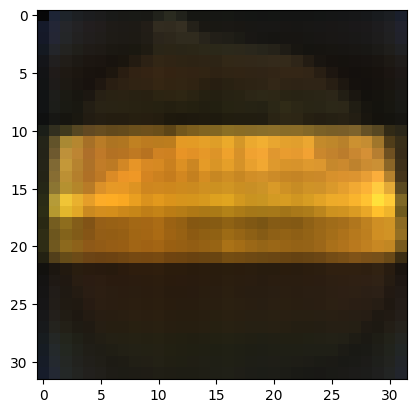

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


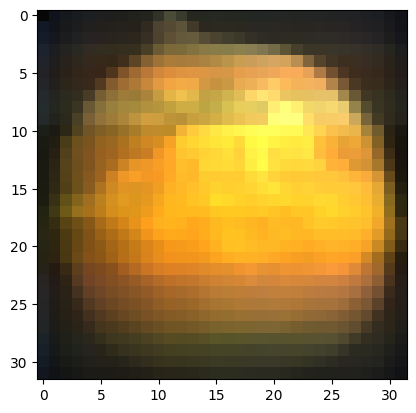

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


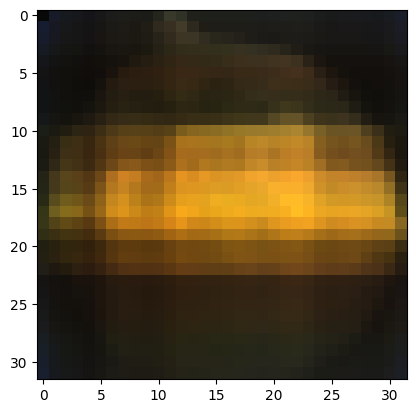

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


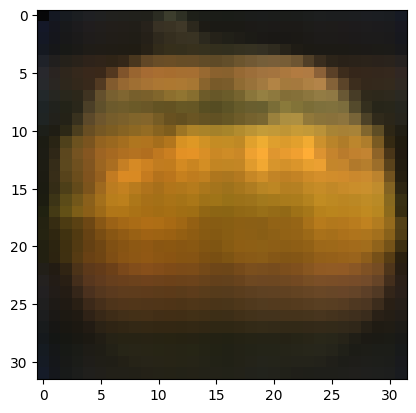

In [24]:
X_recons = (Q * scaleX * 256).astype(np.int32)

for i in range(len(X_recons)):
    plt.imshow(X_recons[i])
    plt.show()

## MovieLensデータセットによる実験

In [25]:
import pandas as pd

df = pd.read_csv("ml-latest-small/movies.csv")

genres_set = set()
for i, r in df.iterrows():
    for el in r["genres"].split("|"):
        genres_set.add(el)
genres_list = list(genres_set)
genres_list

['Children',
 'Horror',
 'Musical',
 'Documentary',
 'IMAX',
 'Drama',
 '(no genres listed)',
 'Western',
 'Film-Noir',
 'Animation',
 'War',
 'Romance',
 'Thriller',
 'Sci-Fi',
 'Adventure',
 'Crime',
 'Fantasy',
 'Mystery',
 'Action',
 'Comedy']

In [26]:
edges_mg_dict = {}
mid_dict = {}
for i, r in df.iterrows():
    for el in r["genres"].split("|"):
        genres_set.add(el)
        j = genres_list.index(el)
        m = int(r["movieId"])
        if m not in mid_dict:
            mid_dict[m] = len(mid_dict)
        if mid_dict[m] not in edges_mg_dict:
            edges_mg_dict[mid_dict[m]] = []
        edges_mg_dict[mid_dict[m]].append(j)
edges_mg_dict

{0: [14, 9, 0, 19, 16],
 1: [14, 0, 16],
 2: [19, 11],
 3: [19, 5, 11],
 4: [19],
 5: [18, 15, 12],
 6: [19, 11],
 7: [14, 0],
 8: [18],
 9: [18, 14, 12],
 10: [19, 5, 11],
 11: [19, 1],
 12: [14, 9, 0],
 13: [5],
 14: [18, 14, 11],
 15: [15, 5],
 16: [5, 11],
 17: [19],
 18: [19],
 19: [18, 19, 15, 5, 12],
 20: [19, 15, 12],
 21: [15, 5, 1, 17, 12],
 22: [18, 15, 12],
 23: [5, 13],
 24: [5, 11],
 25: [5],
 26: [0, 5],
 27: [5, 11],
 28: [14, 5, 16, 17, 13],
 29: [15, 5],
 30: [5],
 31: [17, 13, 12],
 32: [0, 5],
 33: [15, 5],
 34: [0, 19],
 35: [19, 11],
 36: [5],
 37: [5, 10],
 38: [18, 15, 5],
 39: [5],
 40: [18, 14, 16],
 41: [19, 5, 12],
 42: [5, 11],
 43: [17, 12],
 44: [9, 0, 5, 2, 11],
 45: [5, 11],
 46: [15, 17, 12],
 47: [19, 5, 11],
 48: [14, 5],
 49: [0, 19],
 50: [5],
 51: [5],
 52: [19, 5, 11],
 53: [14, 0, 16],
 54: [5, 12],
 55: [5],
 56: [19, 15],
 57: [19, 11],
 58: [19],
 59: [18, 13, 12],
 60: [19, 11],
 61: [19],
 62: [18, 19, 1, 12],
 63: [18],
 64: [19, 5],
 65: 

In [27]:
df = pd.read_csv("ml-latest-small/ratings.csv")
edges = []

for i, r in df.iterrows():
    m = int(r["movieId"])
    if m in mid_dict:
        for g in edges_mg_dict[mid_dict[m]]:
            e = (int(r["userId"]) - 1, mid_dict[m], g, r["rating"])
            edges.append(e)
edges

[(0, 0, 14, 4.0),
 (0, 0, 9, 4.0),
 (0, 0, 0, 4.0),
 (0, 0, 19, 4.0),
 (0, 0, 16, 4.0),
 (0, 2, 19, 4.0),
 (0, 2, 11, 4.0),
 (0, 5, 18, 4.0),
 (0, 5, 15, 4.0),
 (0, 5, 12, 4.0),
 (0, 43, 17, 5.0),
 (0, 43, 12, 5.0),
 (0, 46, 15, 5.0),
 (0, 46, 17, 5.0),
 (0, 46, 12, 5.0),
 (0, 62, 18, 3.0),
 (0, 62, 19, 3.0),
 (0, 62, 1, 3.0),
 (0, 62, 12, 3.0),
 (0, 89, 14, 5.0),
 (0, 89, 19, 5.0),
 (0, 89, 15, 5.0),
 (0, 89, 11, 5.0),
 (0, 97, 18, 4.0),
 (0, 97, 5, 4.0),
 (0, 97, 10, 4.0),
 (0, 124, 18, 5.0),
 (0, 124, 5, 5.0),
 (0, 124, 11, 5.0),
 (0, 124, 10, 5.0),
 (0, 130, 19, 5.0),
 (0, 130, 10, 5.0),
 (0, 136, 18, 5.0),
 (0, 136, 11, 5.0),
 (0, 136, 7, 5.0),
 (0, 184, 19, 5.0),
 (0, 190, 19, 3.0),
 (0, 197, 14, 5.0),
 (0, 197, 19, 5.0),
 (0, 201, 19, 4.0),
 (0, 201, 5, 4.0),
 (0, 224, 18, 5.0),
 (0, 224, 14, 5.0),
 (0, 224, 13, 5.0),
 (0, 257, 19, 3.0),
 (0, 257, 15, 3.0),
 (0, 257, 5, 3.0),
 (0, 257, 12, 3.0),
 (0, 275, 18, 3.0),
 (0, 275, 14, 3.0),
 (0, 275, 13, 3.0),
 (0, 291, 19, 5.0),
 (0,

In [28]:
u_max = max([e[0] for e in edges])
m_max = max([e[1] for e in edges])
g_max = max([e[2] for e in edges])

print(u_max, m_max, g_max)

609 9741 19


In [29]:
import numpy as np

M = np.zeros((u_max + 1, m_max + 1, g_max + 1))
for u, m, g, r in edges:
    M[u, m, g] = r

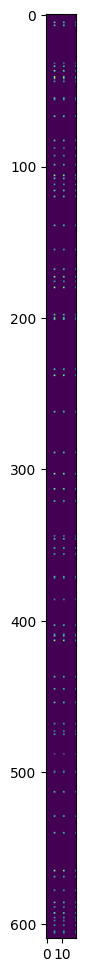

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.imshow(M[:, 10, :])

In [31]:
M_ = M[:10, :10, :]

In [32]:
M_.shape

(10, 10, 20)

In [33]:
print(M_.shape)
all_history_kl, scaleX, Q, Hq = LD(M_, order=2, eps=1.0e-10)

(10, 10, 20)
iter= 0 kl= 3.813074275847818 mse= 1.1246060288774929e-05
iter= 1 kl= 5.1844327730856525 mse= 9.32259524367676e-05
iter= 2 kl= 18.835238382328598 mse= 0.0004940033489383291


In [34]:
print(M_.shape)
all_history_kl, scaleX, Q, Hq = LD_cupy(M_, order=2, eps=1.0e-10, gpu=False)

(10, 10, 20)
iter= 0 kl= 3.813074275847818 mse= 1.1246060288774929e-05
iter= 1 kl= 5.184432773085742 mse= 9.322595243676837e-05
iter= 2 kl= 18.835238382328598 mse= 0.0004940033489383291


In [35]:
print(M_.shape)
all_history_kl, scaleX, Q, Hq = LD_cupy(M_, order=2, eps=1.0e-10)

(10, 10, 20)
iter= 0 kl= 3.813074275847819 mse= 1.1246060288774924e-05
iter= 1 kl= 5.184432773085663 mse= 9.322595243685969e-05
iter= 2 kl= 18.835238382328598 mse= 0.0004940033489383291


In [36]:
from scipy.special import logsumexp

logsumexp([1, 2, 3])

3.4076059644443806